# Assignment 1

## Formalia:

Please read the [assignment overview page](https://github.com/suneman/socialdata2025/wiki/Assignments) carefully before proceeding. This page contains information about formatting (including formats etc.), group sizes, and many other aspects of handing in the assignment. 

_If you fail to follow these simple instructions, it will negatively impact your grade!_

**Due date and time**: The assignment is due on Monday March 3rd, 2025 at 23:55. Hand in your files via DTU Learn. 

In [81]:
# packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import calplot as cp

In [76]:
# fav seaborn style
plt.style.use("seaborn-v0_8-pastel")
plt.rcParams['font.family'] = 'helvetica'

## Part 1

From week 1's exercise, I'd like you to complete the "*Exercise 3*: Temporal patterns". The one where the main plot is the year-by-year evolution of the 10 focus crimes.

**IMPORTANT**: FOR THIS AND ALL SUBSEQUENT EXERCISES, I WANT YOU TO USE THE FULL DATASET FROM 2003 TO 2025.

> Note: The combined dataset was created following the instructions from the [Jupyter Notebook](../files/Correctly_Merge_Data_v2.ipynb), which was provided by the TA's.

In [77]:
# load the combined dataset
df = pd.read_csv('../res/SF_combined_police_reportst_2003_to_present.csv')
df.head()


,Category,PdDistrict,Longitude,Latitude,TimeOfDay,DayOfWeek,DayOfMonth,Month,Year
0,ROBBERY,INGLESIDE,-122.420084,37.708311,17,Monday,22,November,2004
1,VEHICLE THEFT,PARK,-120.500000,90.000000,20,Tuesday,18,October,2005
2,VEHICLE THEFT,SOUTHERN,-120.500000,90.000000,2,Sunday,15,February,2004
3,ASSAULT,SOUTHERN,-122.410541,37.770913,17,Sunday,21,November,2010
4,ASSAULT,TARAVAL,-122.470366,37.745158,15,Tuesday,2,April,2013


### Exercise 3: Temporal patterns.
* To start off easily, let's count the number of crimes per year:
    * What is the year with most crimes? 
    * What is the year with the fewest crimes?.
* Create a barplot of crimes-per-year (years on the $x$-axis, crime-counts on the $y$-axis).
* Finally, Police chief Suneman is interested in the temporal development of only a **subset of categories, the so-called *focus crimes***. Those categories are listed below (for convenient copy-paste action). Create bar-charts displaying the year-by-year development of each of these categories across the years ~~2003-2017~~ 2003 - present.

In [78]:
# --- Exercise 3: Most / fewest crime years
df_years = df.value_counts("Year")

print(f"Year with most crimes: {(df_years.idxmax())}. Count: {df_years.max()}")
print(f"Year with fewest crimes: {(df_years.idxmin())}. Count: {df_years.min()}")

Year with most crimes: 2017. Count: 90058
Year with fewest crimes: 2025. Count: 4067


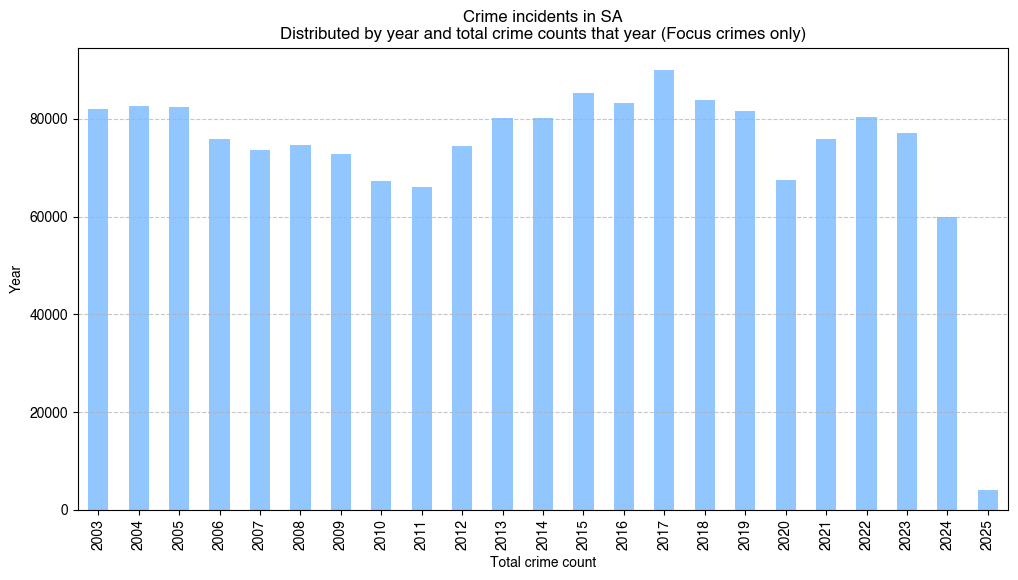

In [79]:
# --- Exercise 3: Yearly trends
df_years = df_years.sort_index()

plt.figure(figsize=(12, 6))
df_years.plot(kind="bar")

plt.title("Crime incidents in SA\nDistributed by year and total crime counts that year (Focus crimes only)")
plt.xlabel("Total crime count")
plt.ylabel("Year")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


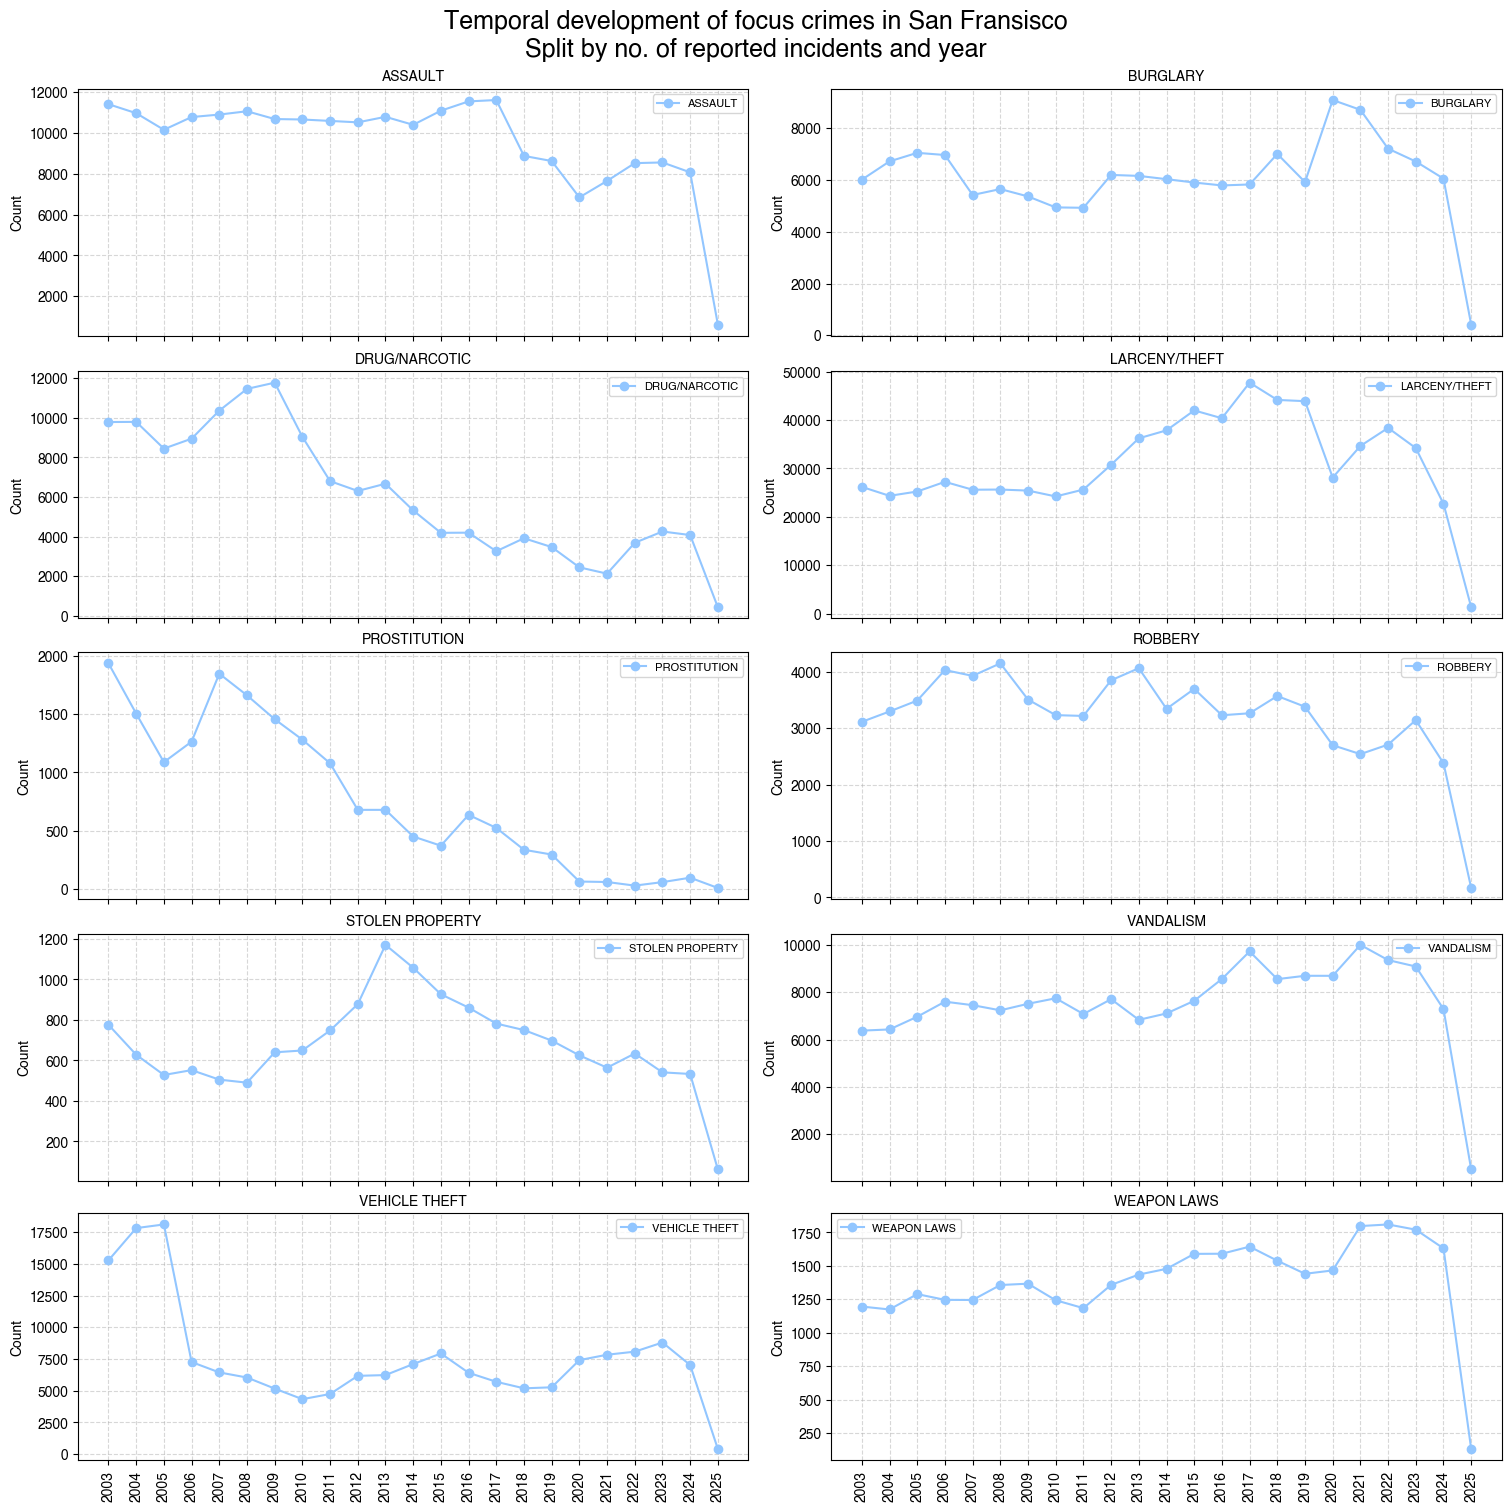

In [80]:
# --- Exercise 3: Focus Plots

# Group by year and category, then count occurrences
category_trends = df.groupby(["Year", "Category"]).size().unstack()

# Create subplots
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 15), sharex=True, constrained_layout=True)
axes = axes.flatten() # Flatten the 2D array of axes for easy iteration

# Plot each crime category in a separate subplot
for i, category in enumerate(category_trends.columns):
    axes[i].plot(category_trends.index, category_trends[category], marker='o', label=category)
    axes[i].set_title(category, fontsize=10)
    axes[i].set_ylabel("Count")
    axes[i].set_xticks(np.arange(2003, 2026), np.arange(2003, 2026), rotation=90)
    axes[i].grid(True, linestyle="--", alpha=0.5)
    axes[i].legend(fontsize=8)

# Show the plot
plt.suptitle("Temporal development of focus crimes in San Fransisco\nSplit by no. of reported incidents and year", fontsize=18)
plt.show()

## Part 2

Next, I would like you to answer some of the questions related to the videos shown during week 2. Specifically, I would like you to

* Answer questions related to the main video-lecture on Data Visualization. (Where the first question is "What is the difference between *data* and *metadata*?")
* Answer questions related to the video on "Nice plots". That is, generate the list of 10 rules for nice plots.


## Excercise: Questions for the lecture. 
 
### What is the difference between *data* and *metadata*? How does that relate to the GPS tracks-example?

Metadata is in some way the "header" of the data; it is what describes the structure of the data. In the video example it might be "latitude", "longitute" or "time". It tells us that the data we are working with has some kind of structure, where each datapoint will probably contain a value in each of these metadata fields.
The data however is the *acutal data* that lies within each datapoint; it is the values of "latitude", "longitute" and "time", such as 100.454, 92.3 and 2010-12-21T17:31:19:000Z (a timestamp). The data can be NaN if it is not defined, as we have also seen in the SF dataset.

### Sune says that the human eye is a great tool for data analysis. Do you agree? Explain why/why not. Mention something that the human eye is very good at. Can you think of something that [is difficult for the human eye](http://cdn.ebaumsworld.com/mediaFiles/picture/718392/84732652.jpg). Explain why your example is difficult. 

Yes I partly agree with what he's saying. This is also how we are taught math when we are young; typically there are some calculations made based on images of i.e. apples or oranges, and it helps us grasp the idea of adding/substracting/multiplying elements, using visual representations.

When we are older, and when we've mastered these techniques, we have taught our brain to understand the difference between 1 and 1000, but actually seeing it with the eye definetily gives us a better understanding.

I'd say the human eye is good at locating danger, both in the sense of reading signs and actually seeing that there might be a danger icon, or simply stopping by red light, because we're taught that it's unsafe to cross a red light. But also in the form of being in dangerous situations, such as avoinding standing at the edge of a balcony, because we know that the consequences might be that we'd fall off it.

Other things that are difficult for the human eye to understand are things that are not visible and are not straightforward, such as windspeed or low/high barometric pressure. Unless you are used to working with these factors (if you are a sailor or something like that), it might be quite difficult to understand what it means that the windspeed is going to be 22 m/s. I believe this is because it's difficult for us to grasp the effect of a invisible variable, unless we're taught it properly, and we have something that we can compare it to. For instance if you've experienced a storm with 35 m/s, where you remember that the effect of it was that you backyard trampoline blew away with the wind, then you're more likely to actually understand how windy that might have been.

### Simpson's paradox is hard to explain. Come up with your own example - or find one on line.

I think the example that Sune explained in the lecture which was about americans performing worse in school, was a nice example of Simpsons paradox. 

I think it's difficult to come up with my own example, so [I found one online](https://causality.cs.ucla.edu/blog/index.php/2020/07/06/race-covid-mortality-and-simpsons-paradox-by-dana-mackenzie/). The example shows diagnosis on COVID-19, based on race, and the correlation between death-occourences in these same groups. At first glance, you can see that 34.6% of Hispanic people diagnosed with COVID-19, where only 17.7% of the same group led to a death. Compared with the white, non-hispanic group: 35.3% of this group diagnosed with COVID-19 and 49.5% of the group led to a death. So this led to the question; are white, non-hispanic people, of greater risk of dying when diagnosed with COVID-19? The answer to the question lied within the data; the article shows a table distributing the age variable of the two groups, showing that in every age category (except ages 0-4), whites have a lower case fatality rate than non-whites. That is, whites make up a lower percentage of deaths than cases. But when we aggregate all of the ages, whites have a higher fatality rate. The reason is simple: whites are older. This is another example on how aggregating the data might change the overall trend of the data, making the data appear different than it actually is.

### In your own words, explain the differnece between *exploratory* and *explanatory* data analysis.

- **Explore**: explore the data, see if you can find patterns, see how the data is related.
- **Explain**: communication of the data, explaining the data to someone else, by highlighting what you found in your exploration phase.

## Part 3

We stay with week 2. I would also like you to complete the exercise in Week 2, Part 4, entitled "*Exercise*: Other cool ways to plot temporal data" (the one where we explore alternatives to bar-plots, such as calendar plots, for plotting temporal data).

In the exercise, i ask you to explore 3 different types of plots. For this assignment, you only need to do a calendar and polar bar chart.


In [82]:
df.head()

,Category,PdDistrict,Longitude,Latitude,TimeOfDay,DayOfWeek,DayOfMonth,Month,Year
0,ROBBERY,INGLESIDE,-122.420084,37.708311,17,Monday,22,November,2004
1,VEHICLE THEFT,PARK,-120.500000,90.000000,20,Tuesday,18,October,2005
2,VEHICLE THEFT,SOUTHERN,-120.500000,90.000000,2,Sunday,15,February,2004
3,ASSAULT,SOUTHERN,-122.410541,37.770913,17,Sunday,21,November,2010
4,ASSAULT,TARAVAL,-122.470366,37.745158,15,Tuesday,2,April,2013


In [94]:
# Calendar plot - using Drug / Narcotic

# add another column to the dataset with the full date entry, i.e. dayofmonth, month and year, as a datetime
df_specific = df["FullDate"] = pd.to_datetime(df["FullDate"], format="%d-%B-%Y")
df_specific
#df_specific = df[(df["Category"] == "DRUG/NARCOTIC")]


# # Group by Date to count crimes per day
# daily_counts = df_specific.groupby("Date").size()

# # Group by 'Date' to count crimes per day
# daily_counts = df_specific.groupby("Date").size()

# # Plot the calendar heatmap
# cp.calplot(daily_counts, cmap="Purples", colorbar=True)


0         2004-11-22
1         2005-10-18
2         2004-02-15
3         2010-11-21
4         2013-04-02
             ...    
1701418   2023-03-22
1701419   2023-03-22
1701420   2023-03-22
1701421   2023-03-22
1701422   2023-03-21
Name: FullDate, Length: 1701423, dtype: datetime64[ns]

In [ ]:
# Polar bar chart - using Prostitution

## Part 4

From week 3, I'd like you to work on the exercise contained in Week 3, Part 3. Specifically, I would like you to **both** complete "*Excercise Part 1*: Connecting the dots and recreating plots from DAOST but using our own favorite dataset" and "*Excercise Part 2*". These exercises focus on reproducing figure 2.1, 2.4 and 2.11 and exploring a few more ideas from the book using data from SFPD.


## Part 5

Finally, I'd like you to work on the exercise "*Exercise*: Using all the tools to understand the temporal trends of prostitution in SF over time" in Week 4, Part 3. 